# Корреляция

Важно выявить и количественно оценить степень зависимости переменных в вашем наборе данных друг от друга. С одной стороны, выявление зависимостей это вообще базовая задача анализа данных. Переменные в наборе данных могут быть связаны по разным причинам.

Например:

- Одна переменная может быть причиной или зависеть от значений другой переменной.
- Одна переменная может быть слабо связана с другой переменной.
- Две переменные могут зависеть от третьей неизвестной переменной.

Статистическая взаимосвязь между двумя переменными называется их корреляцией.

Корреляция может быть положительной, что означает, что обе переменные изменяются в одном направлении, или отрицательной, что означает, что при увеличении значения одной переменной значения другой уменьшаются. Корреляция также может быть нейтральной или равной нулю, что означает, что переменные не связаны.

Производительность некоторых алгоритмов может ухудшаться, если две или более переменные тесно связаны, что называется мультиколлинеарностью. Примером является линейная регрессия, где одна из сильно коррелирующих переменных должна быть удалена для повышения точности модели.

Нас также может интересовать корреляция между регрессорами и зависимой переменной, чтобы понять, какие из регрессоров релевантны для построения модели.

Структура связи может быть известна, например, она может быть линейной, или мы можем не знать, существует ли связь между двумя переменными и какова ее структура. В зависимости от того, что известно о связи и распределении переменных, могут быть рассчитаны различные коэффициенты корреляции. Мы рассмотрим корреляцию Пирсона, Спирмена и Кендалла.

## Ковариация.

Прежде чем мы перейдем к расчету некоторых коэффициентов корреляции, нам нужно рассмотреть важный статистический элемент, называемый ковариацией.

Самая простая зависимость, которую можно предположить между двумя переменными -- линейная. Её можно измерить с помощью ковариации, которая определяется как 

$$ cov(X, Y) = E(X - E(X))(Y_i - E(Y)) $$
<!-- $$ cov(X, Y) = \frac{1}{n} \sum_i(X_i - \bar{X})(Y_i - \bar{Y}) $$ -->

Знак ковариации можно интерпретировать как указание на то, изменяются ли две переменные в одном направлении (положительный) или в разных направлениях (отрицательный). Величину корреляции проинтерпретировать нельзя, так как она зависит от единиц измерения обеих величин. Для независимых случайных величин корреляция равна нулю, хотя обратное верно не всегда.

Для выборки можно рассчитать аналог

$$\frac{1}{n} \sum_i (X_i  - \overline{X})(Y_i  - \overline{Y})$$


In [33]:
# calculate the covariance between two variables
from numpy.random import randn, seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


## Корреляция Пирсона

Корреляция Пирсона (названная в честь Карла Пирсона) представляет собой ковариацию, нормированную на стандартные отклонения обеих переменных:

$$
r = \frac{{\sum_i (X_i  - \overline{X})(Y_i  - \overline{Y})}}{{\sqrt{{\sum_i (X_i  - \overline{X})^2 \cdot \sum_i (Y_i  - \overline{Y})^2}}}}
$$


Предпосылки:

- Величины должны быть непрерывными.
- Нет выбросов.
- Зависимость линейная
- Гомоскедастичность

In [34]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


Существует также процедура проверки гипотезы на значимость

- Нулевая гипотеза: 
$$ H_0: \rho = 0 $$

- Альтернативная гипотеза: 
$$ H_1: \rho \neq 0 $$

- Тестовая статистика: 
$$ t = r \sqrt{\frac{n - 2}{1 - r^2}} $$

- Распределение: t-распределение с \( n - 2 \) степенями свободы при условии что X и Y имеют совместное нормальное распределение при выполнеии $H_0$.


## Корреляция Спирмена

Корреляция Спирмена предполагает наличие уже не линейной, а монотонной зависимости.

$$ r_s = \frac{\sum_{i=1}^n (R(X_i) - \overline{R(X)})(R(Y_i) - \overline{R(Y)})}{\sqrt{\sum_{i=1}^n (R(X_i) - \overline{R(X)})^2 \cdot \sum_{i=1}^n (R(Y_i) - \overline{R(Y)})^2}} = 1 - \frac{6 \sum_{i=1}^n (R(X_i) - R(y_i))^2}{n(n^2 - 1)}
 $$

 где $R(x)$ -- ранг наблюдения. В классической постановке -- номер наблюдения в вариационном ряде. Корреляция Спирмена является просто корреляцией Пирсона для рангов наблюдений. 0 означает отсутствие зависимости, а +1 и -1 -- наличие строгой монотонной зависимости, положительной или отрицательной соответственно.




In [35]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)

# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


Аналогично Пирсону, существует тест для проверки значимости корреляции.

 - Нулевая гипотеза: 
$$ H_0: \rho_s = 0 $$

- Альтернативная гипотеза: 
$$ H_1: \rho_s \neq 0 $$

- Тестовая статистика: 
$$ t = r_s \sqrt{\frac{n - 2}{1 - r_s^2}} $$

- Распределение: t-распределение с \( n - 2 \) степенями свободы. Обратите внимание, для этого теста предпосылка о нормальности не требуется.

## Корреляция Кендалла


Рассмотрим ещё один вариант, который подходит для дискретных выборок. В общем виде корреляция Спирмена и Кендалла являются частными случаями общего понятия [ранговой корреляции](https://en.wikipedia.org/wiki/Rank_correlation#General_correlation_coefficient). Коэффициент $\tau_B$ Кендалла определяется как:
$$
\tau_B = \frac{n_c - n_d}{\sqrt{(n_0 - n_1)(n_0 - n_2)}}
$$
где
$$
n_0 = \frac{n(n - 1)}{2}
$$
$$
n_1 = \sum_i \frac{t_i(t_i - 1)}{2}
$$
$$
n_2 = \sum_j \frac{u_j(u_j - 1)}{2}
$$

$n_c$ — количество согласованных пар, то есть пар, где \(0 < i < j < n\), для которых \(x_i < x_j\) и \(y_i < y_j\) или \(x_i > x_j\) и \(y_i > y_j\).

$n_d$ — количество несогласованных пар, то есть пар, где \(0 < i < j < n\), для которых \(x_i < x_j\) и \(y_i > y_j\) или \(x_i > x_j\) и \(y_i < y_j\).

$t_i$ — количество совпадающих значений в \(i\)-й группе совпадений для эмпирического распределения \(X\).

$u_j$ — количество совпадающих значений в \(j\)-й группе совпадений для эмпирического распределения \(Y\).


In [36]:
# calculate the kendall's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import kendalltau
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = kendalltau(data1, data2)
print('Kendall correlation: %.3f' % corr)

Kendall correlation: 0.688


Аналогично, можно провести тест на значимость

- Нулевая гипотеза: 
$$ H_0: \tau = 0 $$

- Альтернативная гипотеза: 
$$ H_1: \tau \neq 0 $$

- Тестовая статистика: нормализированная статистика Кендалла ($\tau$).

- Распределение: асимптотически нормальное распределение при больших $ n $ (Перепроверить)

## Корреляция Пирсона vs Корреляции Спирмена и Кендалла

- **Типы данных**: В случае непараметрической корреляции переменные X и Y могут быть непрерывными или порядковыми, и нормальное распределение для X и Y не требуется. Однако в случае корреляции Пирсона предполагается, что распределения X и Y должны быть нормальными и непрерывными.
- Коэффициенты корреляции измеряют только линейные (Пирсон) или монотонные (Спирмен и Кендалл) зависимости.

## Корреляция Спирмена vs Корреляция Кендалла

- **Надёжность**: Корреляция Кендалла более устойчива к повторяющимся значениям и более эффективна для малых выборок. Корреляция Спирмена более устойчива к выбросам.
- **Сложность вычислений**: Корреляция Кендалла имеет вычислительную сложность O(n^2) по сравнению с O(n log n) для корреляции Спирмена, где n — размер выборки.
- **Величина коэффициента**: Значение коэффициента Спирмена (ρ) обычно больше значения коэффициента Кендалла (τ).
- **Интерпретация**: Интерпретация коэффициента τ Кендалла в терминах вероятности наблюдения согласованных (concordant) и несогласованных (discordant) пар является очень прямолинейной.
"""

## Примеры для некоторых вариантов зависимостей

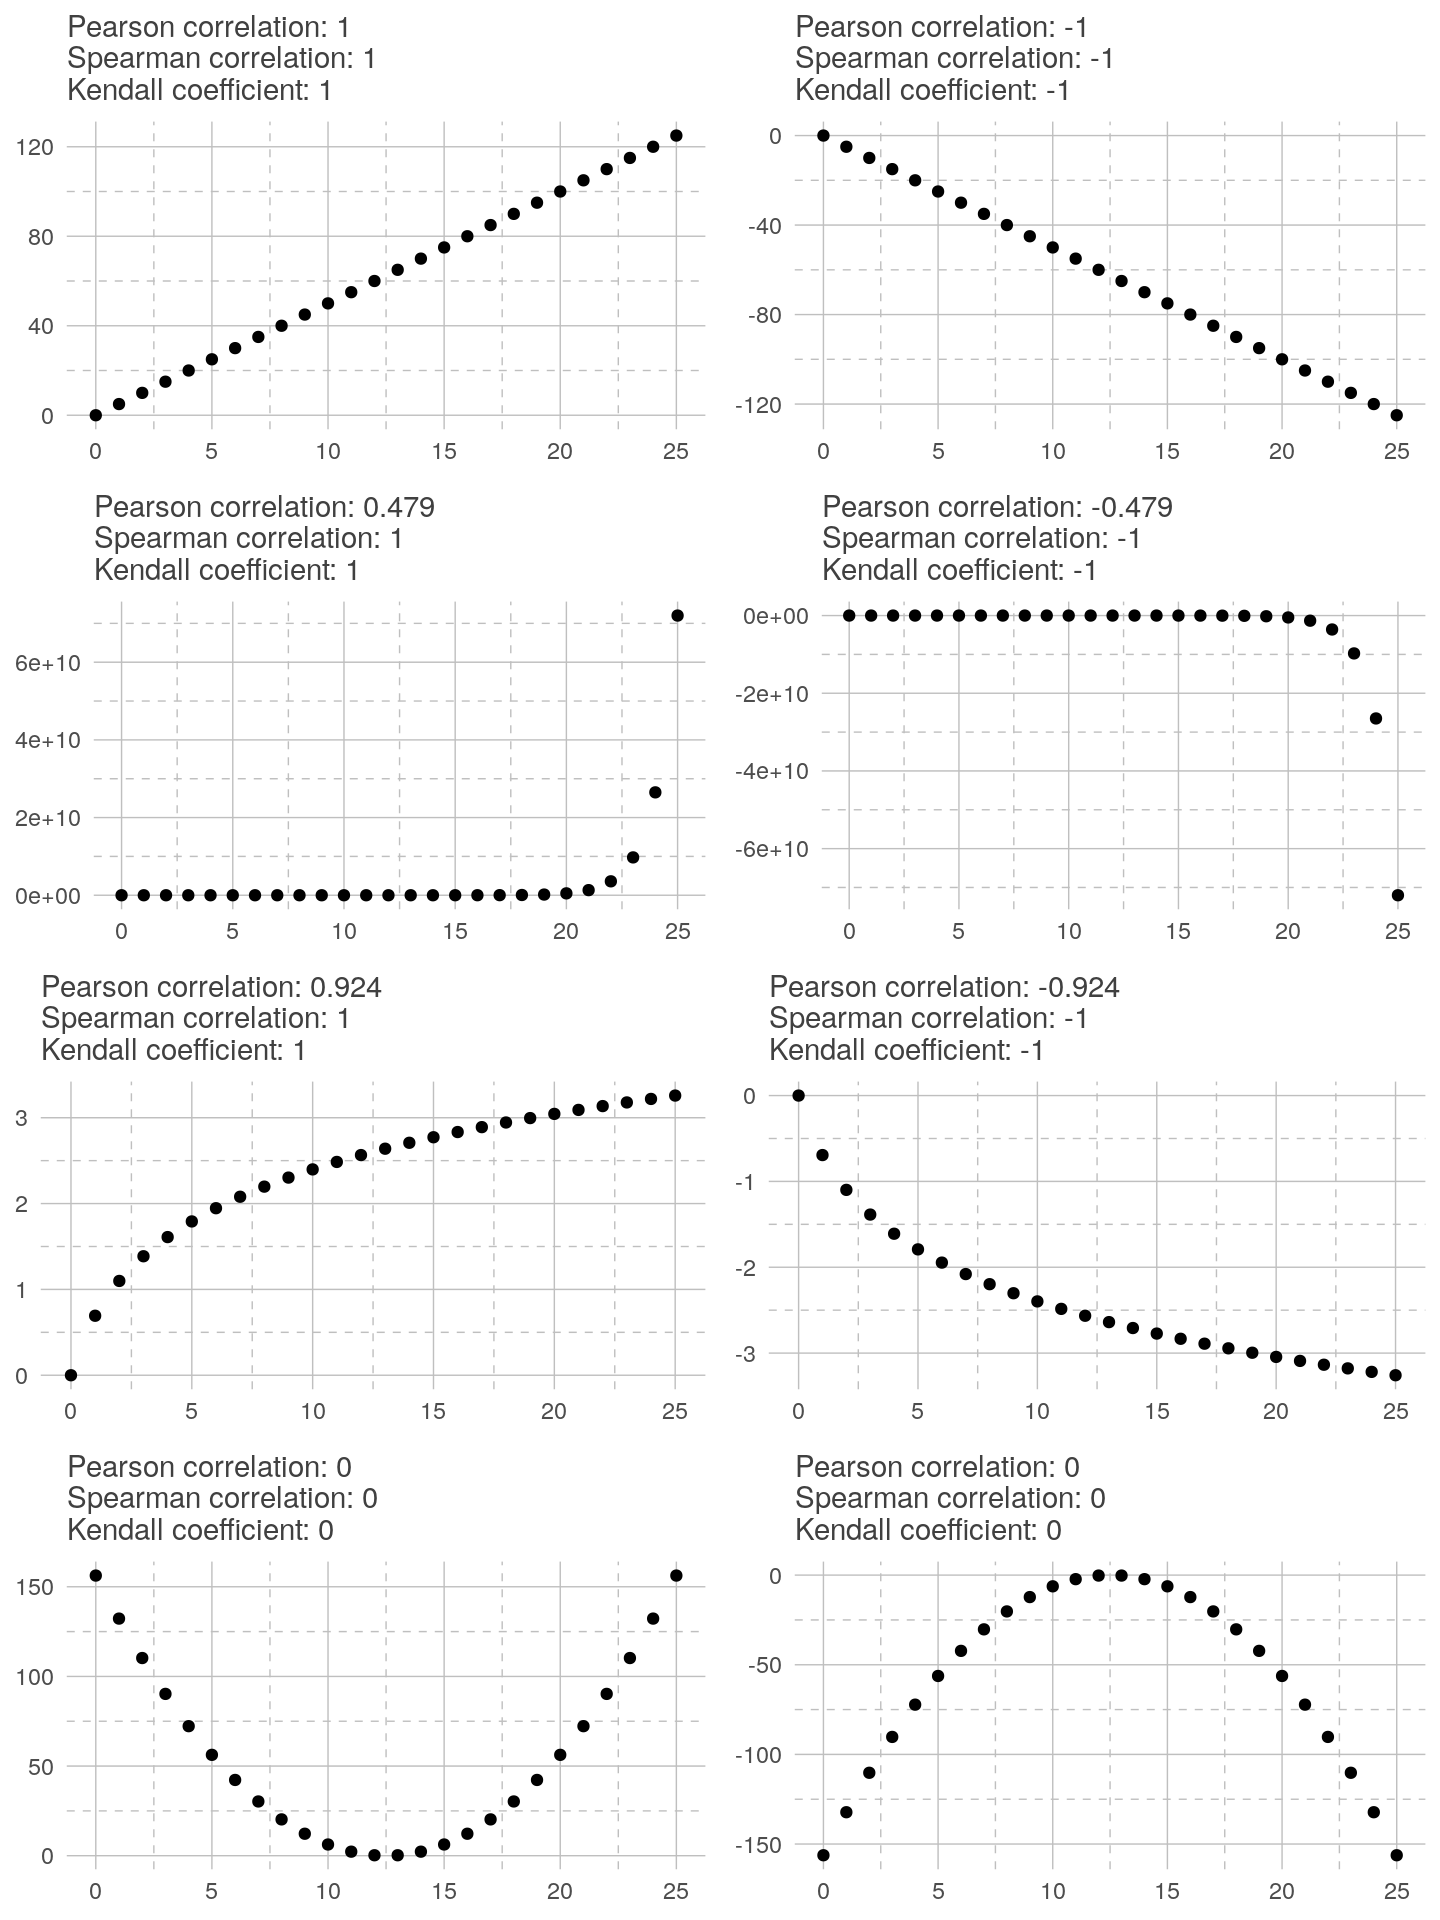

## Примеры для датасета Iris

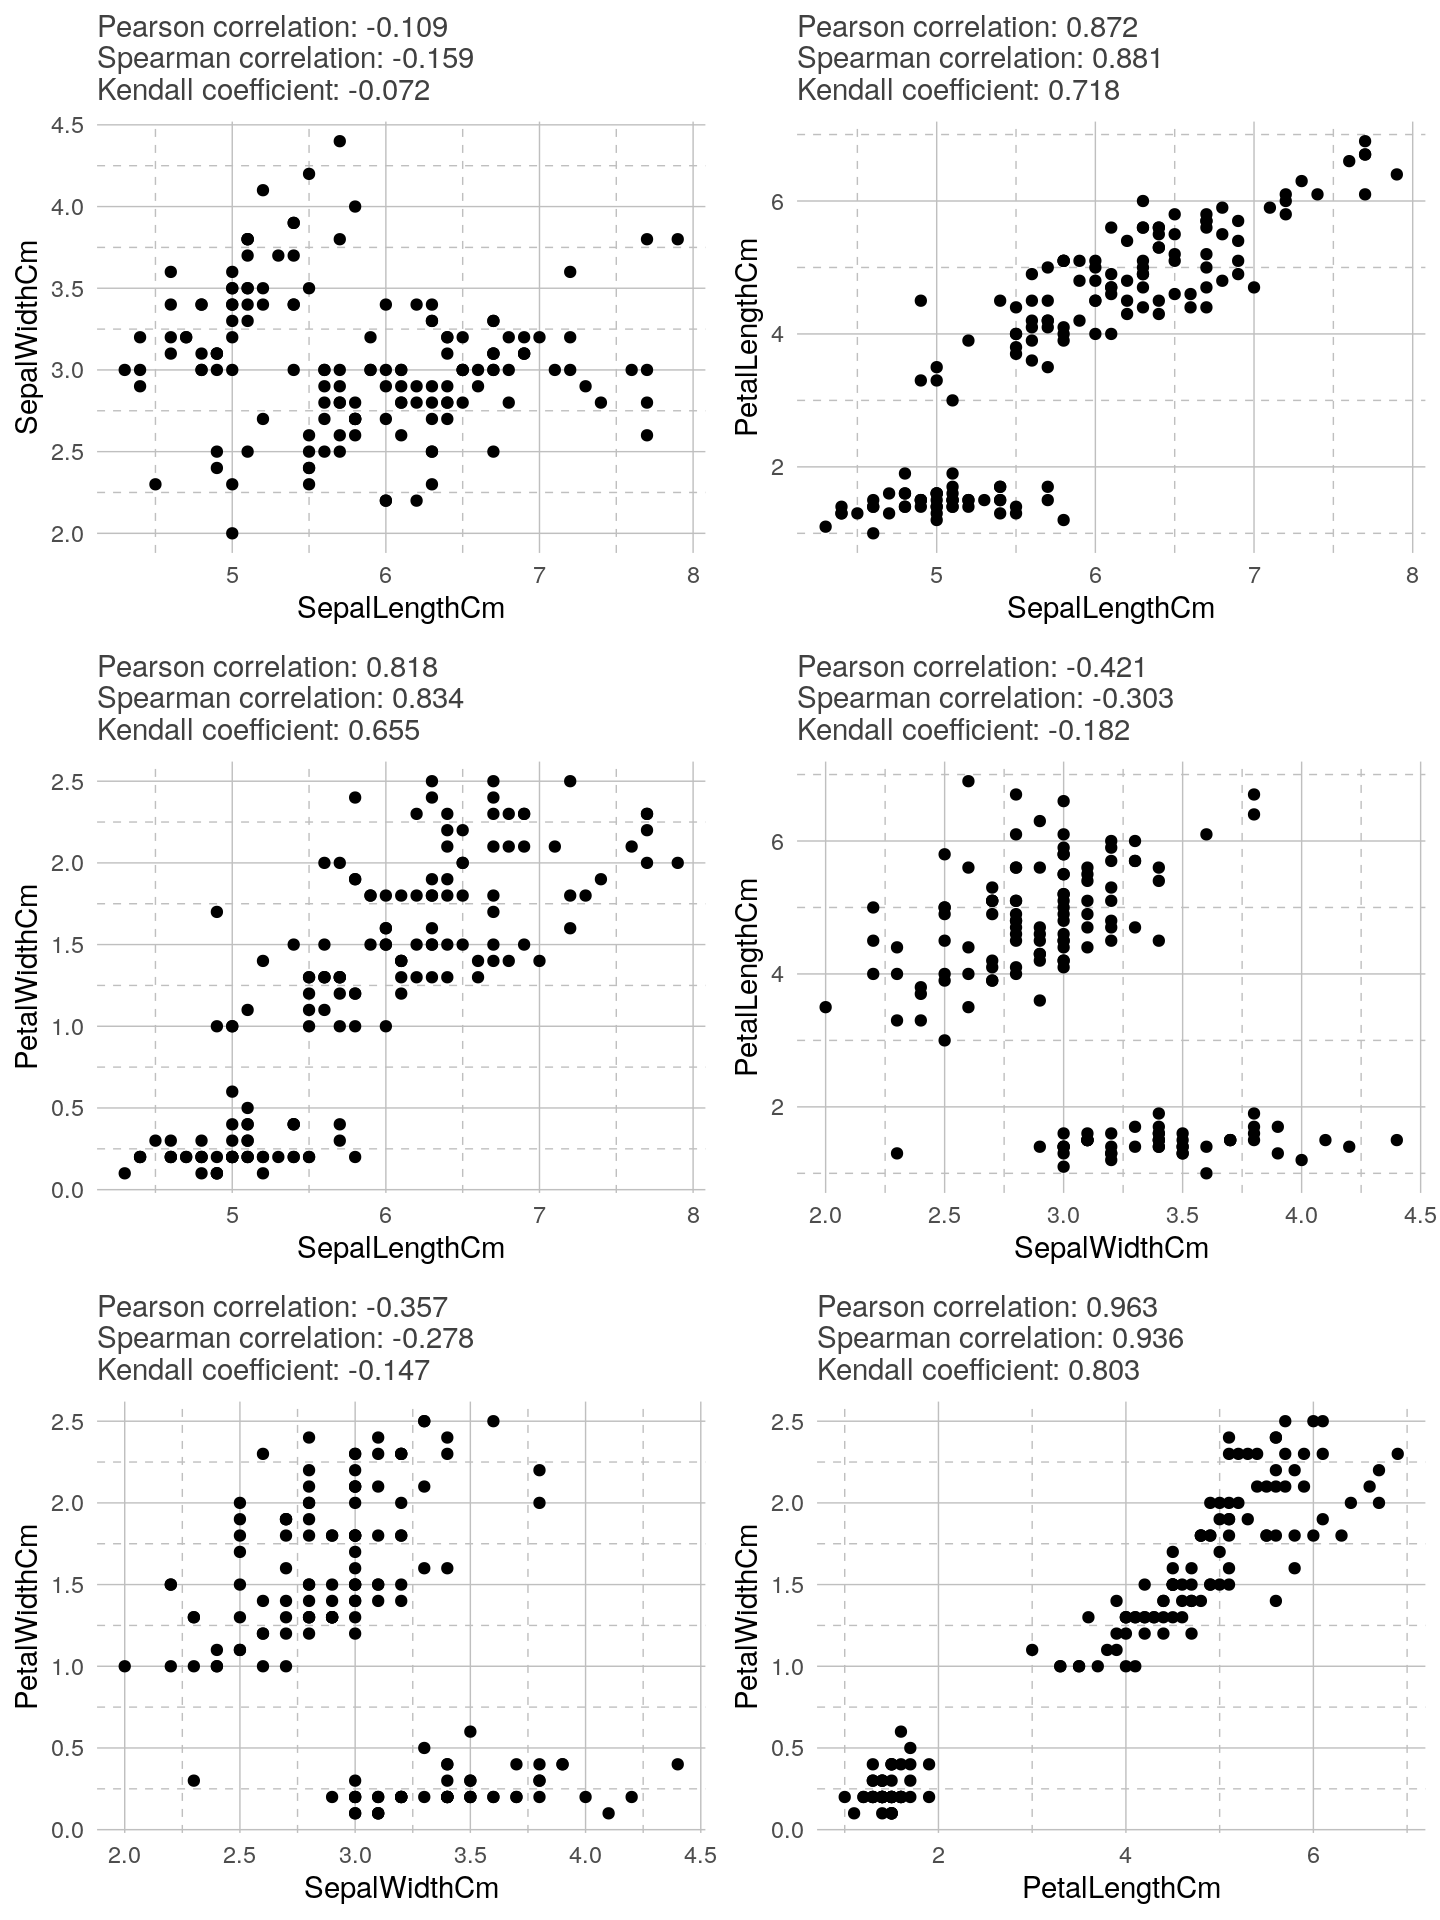

## Эксперимент

Давайте посмотрим, что произойдёт, если выбрать $X$ из распределения Пуассона (не являющегося нормальным), а затем построим нелинейную зависимость $Y = e^X + \epsilon$, где $\epsilon \sim N(0, \sigma^2)$.

Мы рассчитаем ранговую корреляцию Спирмена и обычный коэффициент корреляции для этих данных, а затем повторим эксперимент много раз. Поскольку $e^X$ создаёт множество значений, значительно отличающихся от остальных, это можно рассматривать как моделирование "выбросов" в данных. Ранговая корреляция Спирмена сжимает влияние выбросов и лучше измеряет корреляцию. Обычная корреляция запутывается из-за выбросов и, в среднем, показывает меньшую связь, чем она есть на самом деле.

In [37]:
import numpy as np 
import scipy.stats as ss
## Let's see an example of this
n = 100

def compare_correlation_and_spearman_rank(n, noise):

    X = np.random.poisson(size=n)
    Y = np.exp(X) + noise * np.random.normal(size=n) + np.random.binomial(1, 0.15, size=n) * 100

    pearson, _ = pearsonr(X, Y)
    spearman, _ = spearmanr(X, Y)
    kendall, _ = kendalltau(X, Y)

    
    return pearson, spearman, kendall

experiments = 1000
spearman_dist = np.ndarray(experiments)
correlation_dist = np.ndarray(experiments)
kendall_dist = np.ndarray(experiments)

for i in range(experiments):
    p, s, k = compare_correlation_and_spearman_rank(n, 1)
    correlation_dist[i] = p
    spearman_dist[i] = s
    kendall_dist[i] = k
    
print(f'Correlation coefficient: {np.mean(correlation_dist)}')
print(f'Spearman Rank Coefficient: {np.mean(spearman_dist)}')
print(f'Kendall Rank Coefficient: {np.mean(kendall_dist)}')
# Compare to the regular correlation coefficient

Correlation coefficient: 0.2151688841637797
Spearman Rank Coefficient: 0.6524170413233182
Kendall Rank Coefficient: 0.5676451685988942


Сопоставим распределения коэффициентов. Заметно, что корреляция Пирсона занижает силу зависимости.

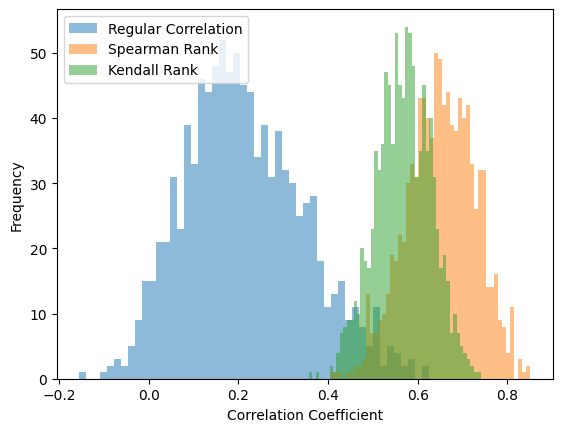

In [38]:
import matplotlib.pyplot as plt


plt.hist(correlation_dist, bins=50, alpha=0.5)
plt.hist(spearman_dist, bins=50, alpha=0.5)
plt.hist(kendall_dist, bins=50, alpha=0.5)
plt.legend(['Regular Correlation', 'Spearman Rank','Kendall Rank' ])
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency');

Теперь попробуем поварьировать дисперсию шума. Заметно, что обе метрики снижают своё качество, но в большинстве 

Text(0, 0.5, 'Average Correlation Coefficient')

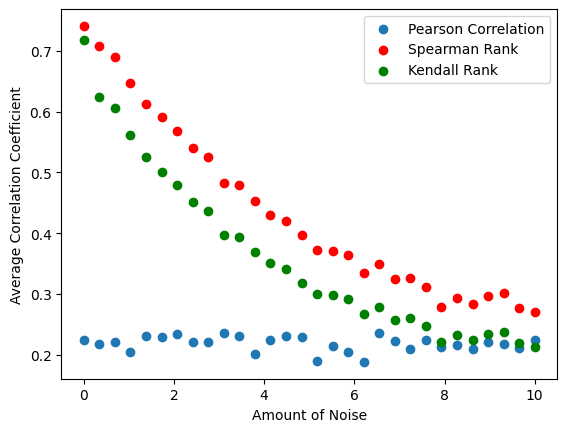

In [39]:
n = 100
noises = np.linspace(0, 10, 30)
experiments = 100
correlation = np.ndarray(len(noises))
spearman = np.ndarray(len(noises))
kendall = np.ndarray(len(noises))

for i in range(len(noises)):
    # Run many experiments for each noise setting
    pearson_coef = 0.0
    spearman_coef = 0.0
    kendall_coef = 0
    noise = noises[i]
    for j in range(experiments):
        p, s, k = compare_correlation_and_spearman_rank(n, noise)
        pearson_coef += p
        spearman_coef += s
        kendall_coef += k
    correlation[i] = pearson_coef/experiments
    spearman[i] = spearman_coef/experiments
    kendall[i] = kendall_coef/experiments
    
plt.scatter(noises, correlation)
plt.scatter(noises, spearman, color='r')
plt.scatter(noises, kendall, color='g')
plt.legend(['Pearson Correlation', 'Spearman Rank', 'Kendall Rank'])
plt.xlabel('Amount of Noise')
plt.ylabel('Average Correlation Coefficient')

# Белый шум


#### Определение:
Процесс $\{ \varepsilon_t \}$ называется **белым шумом**, если он удовлетворяет следующим условиям:

1. **Математическое ожидание равно нулю**:
   $$
   \mathbb{E}[\varepsilon_t] = 0, \quad \forall t.
   $$

2. **Постоянная дисперсия**:
   $$
   \text{Var}(\varepsilon_t) = \sigma^2, \quad \forall t,
   $$
   где $\sigma^2 > 0$ — константа.

3. **Отсутствие автокорреляции**:
   $$
   \text{Cov}(\varepsilon_t, \varepsilon_{t-k}) = 0, \quad \forall k \neq 0.
   $$

#### Формальное обозначение:
$$
\varepsilon_t \sim WN(0, \sigma^2),
$$
где $WN$ обозначает "белый шум" с математическим ожиданием $0$ и дисперсией $\sigma^2$.

#### Дополнительные предположения:
- Если дополнительно предполагается нормальность распределения, то процесс называется **гауссовским белым шумом**:
  $$
  \varepsilon_t \sim \mathcal{N}(0, \sigma^2).
  $$


In [40]:
# Импортируем необходимые библиотеки
import numpy as np
import plotly.graph_objects as go

# Генерация белого шума
np.random.seed(42)  # Для воспроизводимости результатов
n = 300  # Количество наблюдений
mean = 0  # Математическое ожидание
std_dev = 1  # Стандартное отклонение (корень из дисперсии)

# Генерация данных белого шума
white_noise = np.random.normal(loc=mean, scale=std_dev, size=n)

# Создание временной оси
time_index = np.arange(n)

# Визуализация с помощью Plotly
fig = go.Figure()

# Добавление данных на график
fig.add_trace(go.Scatter(
    x=time_index,
    y=white_noise,
    mode='lines',
    name='Белый шум',
    line=dict(color='blue', width=2)
))

# Настройка макета графика
fig.update_layout(
    title="Процесс белого шума",
    xaxis_title="Время (t)",
    yaxis_title="Значение",
    template="plotly_white",
    showlegend=True
)

# Отображение графика
fig.show()

In [41]:
import yfinance as yf

prices = yf.download(
    tickers='TSLA',
    start='2020-01-01',
    end='2024-04-16',
)['Close']['TSLA']

prices

# Визуализация с помощью Plotly
fig = go.Figure()

# Добавление данных на график
fig.add_trace(go.Scatter(
    x=prices.index,
    y=prices.values,
    mode='lines',
    name='Цена',
    line=dict(color='blue', width=2)
))

# Настройка макета графика
fig.update_layout(
    title="Стоимость акций Tesla",
    xaxis_title="Время",
    yaxis_title="Значение",
    template="plotly_white",
    showlegend=True
)

# Отображение графика
fig.show()

[*********************100%***********************]  1 of 1 completed


In [42]:

# Визуализация с помощью Plotly
fig = go.Figure()

# Добавление данных на график
fig.add_trace(go.Scatter(
    x=prices.index,
    y=prices.diff().values,
    mode='lines',
    name='Цена',
    line=dict(color='blue', width=2)
))

# Настройка макета графика
fig.update_layout(
    title="Стоимость акций Tesla",
    xaxis_title="Время",
    yaxis_title="Значение",
    template="plotly_white",
    showlegend=True
)

# Отображение графика
fig.show()

In [43]:
price_diff = prices.diff().dropna()

# Автокорреляция

TODO: Добавить к каждому тесту строгие предпосылки.

$$
r_k = \frac{\sum_{t=1}^{T-k} (x_t - \bar{x})(x_{t+k} - \bar{x})}{\sum_{t=1}^n (x_t - \bar{x})^2}
$$

Для графиков нам необходимо знать дисперсию этой величины. Существует два основных варианта подсчёта в зависимости от входных условий:

* Если мы предполагаем истинный процесс белым шумом. Например, если мы тестируем остатки некоторой модели на соответствие белому шуму:

$$
\text{Var}(r_k) = \frac{1}{n}
$$

* Для исходных данных обычно рассчитывают дисперсию по формуле Бартлетта. Она вычисляет дисперсию $r_k$ таким образом, словно истинный процесс это MA(k-1). Тогда если все автокорреляции исчезают после определённого лага, можно предположить, что процесс -- это MA(q), где q -- последний значимый лаг на графике.

$$
\text{Var}(r_k) \approx \frac{1}{n} \left( 1 + 2 \sum_{j=1}^{k-1} \left( 1 - \frac{j}{k} \right) r_j^2 \right)
$$

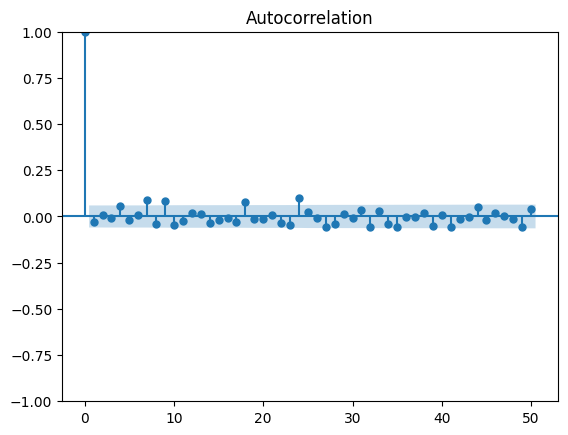

In [44]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(prices.diff().dropna(),lags=50);

### Тест Box-Pierce

#### Описание:
Тест Box-Pierce используется для проверки гипотезы о том, что выборочные автокорреляции на заданных лагах не отличаются от нуля. 

$$
H_0: \rho_1 = \rho_2 = \dots = \rho_m = 0,\\
H_1: \exists \rho_k \neq 0,
$$
где $\rho_k$ — истинные коэффициенты автокорреляции на лагах $k = 1, 2, \dots, m$.


#### Статистика теста:
$$
Q = T \sum_{k=1}^m r_k^2,
$$
где:
- $T$ — размер выборки,
- $r_k$ — выборочный коэффициент автокорреляции на лаге $k$,
- $m$ — максимальный лаг для анализа.

Под нулевой гипотезой $Q \sim \chi^2(m)$, где $\chi^2(m)$ — хи-квадрат распределение с $m$ степенями свободы.

Результат может зависеть от параметра m. Обычно проверяют несколько различных $m$, они должны быть согласованы.


### Тест Ljung-Box

#### Описание:
Тест Ljung-Box — модифицированная версия теста Box-Pierce, которая улучшает аппроксимацию распределения статистики теста для малых выборок.

$$
H_0: \rho_1 = \rho_2 = \dots = \rho_m = 0,\\
H_1: \exists \rho_k \neq 0.
$$


#### Статистика теста:
$$
Q^* = T(T+2) \sum_{k=1}^m \frac{r_k^2}{n-k},
$$
где:
- $T$ — размер выборки,
- $r_k$ — выборочный коэффициент автокорреляции на лаге $k$,
- $m$ — максимальный лаг для анализа.

Под нулевой гипотезой $Q^* \sim \chi^2(m)$.

In [45]:
lb_bp_test = acorr_ljungbox(price_diff, lags=[50], boxpierce=True, return_df=True)

print("Тесты для доходностей:")
print( lb_bp_test)

Тесты для доходностей:
      lb_stat  lb_pvalue    bp_stat  bp_pvalue
50  88.027856   0.000723  85.947299   0.001182


In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Генерация данных вручную для модели ETS(A, Ad, N)
np.random.seed(42)
n = 100

# Параметры модели
alpha = 0.5  # Параметр сглаживания уровня
beta = 0.2   # Параметр сглаживания тренда
phi = 0.9    # Коэффициент затухания тренда
sigma = 0.5  # Стандартное отклонение ошибки

# Инициализация переменных
level = [10]  # Начальный уровень
trend = [1]   # Начальный тренд
data = []     # Сгенерированные данные

# Генерация данных
for t in range(n):
    # Генерация ошибки
    error_t = np.random.normal(0, sigma)
    
    # Обновление уровня и тренда
    level_t = level[-1] + phi * trend[-1] + error_t
    trend_t = phi * trend[-1] + beta * error_t
    
    # Сохранение значений
    level.append(level_t)
    trend.append(trend_t)
    data.append(level_t)

# Преобразуем данные в Pandas Series
simulated_data = pd.Series(data)
# Визуализация сгенерированных данных с использованием Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=simulated_data.index,
    y=simulated_data,
    mode='lines',
    name='',
    line=dict(color='blue', width=2)
))

# Настройка макета графика
fig.update_layout(
    title="Сгенерированные данные ETS(A, Ad, N)",
    xaxis_title="Время (t)",
    yaxis_title="Значение",
    template="plotly_white",
    showlegend=True
)

# Отображение графика
fig.show()

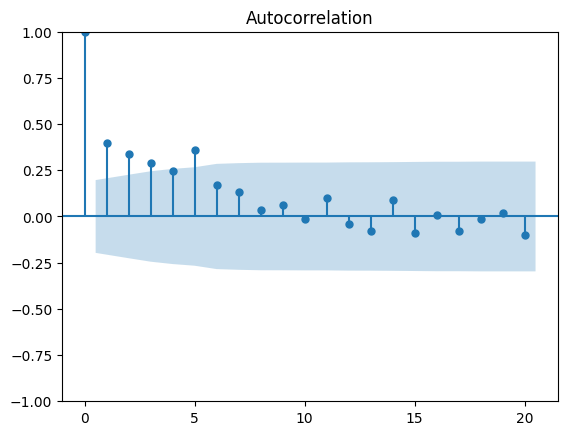

In [47]:
plot_acf(simulated_data.diff().dropna());

In [48]:
# Тесты Ljung-Box и Box-Pierce для исходных данных
bp_test_original = acorr_ljungbox(simulated_data.diff().dropna(), lags=[4], boxpierce=True, return_df=True)

print("Тесты для исходных данных:")
print(bp_test_original)


Тесты для исходных данных:
     lb_stat     lb_pvalue    bp_stat     bp_pvalue
4  42.841011  1.116447e-08  41.090975  2.573739e-08


In [49]:
# Оцениваем корректную модель ETS
correct_ets = sm.tsa.ExponentialSmoothing(
    simulated_data,
    trend="add",
    damped_trend=True,
    seasonal=None
).fit()

# Оцениваем ошибочную модель ETS (например, без тренда)
incorrect_ets = sm.tsa.ExponentialSmoothing(
    simulated_data,
    trend=None,  # Нет тренда
    seasonal=None
).fit()

# Получаем остатки обеих моделей
correct_residuals = correct_ets.resid
incorrect_residuals = incorrect_ets.resid

# Тесты Ljung-Box и Box-Pierce для остатков корректной модели
lb_bp_test_correct = acorr_ljungbox(correct_residuals, lags=[10], boxpierce=True, return_df=True)

print("\nТесты для остатков корректной модели ETS:")
print(lb_bp_test_correct)

# Тесты Ljung-Box и Box-Pierce для остатков ошибочной модели
lb_bp_test_incorrect = acorr_ljungbox(incorrect_residuals, lags=[10], boxpierce=True, return_df=True)

print("\nТесты для остатков ошибочной модели ETS:")
print(lb_bp_test_incorrect)


Тесты для остатков корректной модели ETS:
     lb_stat  lb_pvalue   bp_stat  bp_pvalue
10  7.032805   0.722344  6.489147   0.772631

Тесты для остатков ошибочной модели ETS:
      lb_stat     lb_pvalue    bp_stat     bp_pvalue
10  63.736643  7.065918e-10  60.500566  2.913741e-09


In [52]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=simulated_data.index,
    y=correct_residuals,
    mode='lines',
    name='',
    line=dict(color='blue', width=2)
))

# Настройка макета графика
fig.update_layout(
    title="Сгенерированные данные ETS(A, Ad, N)",
    xaxis_title="Время (t)",
    yaxis_title="Значение",
    template="plotly_white",
    showlegend=True
)

# Отображение графика
fig.show()


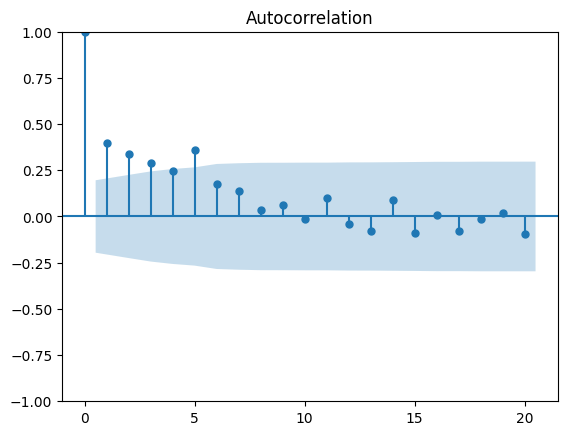

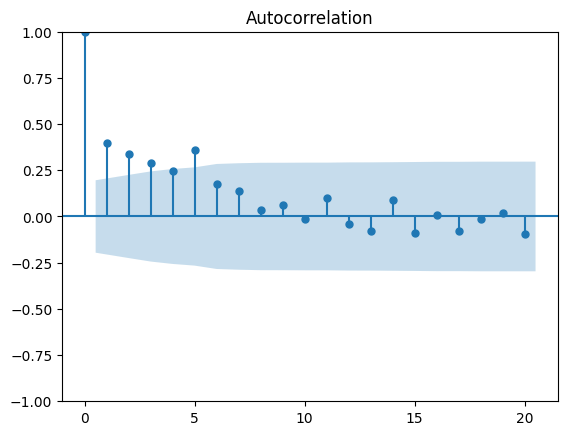

In [54]:
plot_acf(incorrect_residuals)

In [53]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=simulated_data.index,
    y=incorrect_residuals,
    mode='lines',
    name='',
    line=dict(color='blue', width=2)
))

# Настройка макета графика
fig.update_layout(
    title="Сгенерированные данные ETS(A, Ad, N)",
    xaxis_title="Время (t)",
    yaxis_title="Значение",
    template="plotly_white",
    showlegend=True
)

# Отображение графика
fig.show()


### Тест Breusch-Godfrey

#### Описание:
Тест Breusch-Godfrey предназначен для проверки наличия автокорреляции в остатках регрессионной модели. Он более универсален, чем тесты Box-Pierce и Ljung-Box, так как может использоваться для моделей с зависимыми переменными и не требует нормальности ошибок.

#### Предпосылки:
1. Имеется регрессионная модель:
   $$
   y_t = X_t \beta + \varepsilon_t,
   $$
   где $\varepsilon_t$ — остатки модели.
2. Проверяется гипотеза об отсутствии автокорреляции в остатках $\varepsilon_t$.

$$
H_0: \rho_1 = \rho_2 = \dots = \rho_m = 0,\\
H_1: \exists \rho_k \neq 0.
$$


#### Процедура теста:
1. Оцените исходную регрессионную модель и получите остатки $\hat{\varepsilon}_t$.
2. Регрессируйте остатки $\hat{\varepsilon}_t$ на переменные $X_t$ и их лагированные значения $\hat{\varepsilon}_{t-1}, \hat{\varepsilon}_{t-2}, \dots, \hat{\varepsilon}_{t-m}$:
   $$
   \hat{\varepsilon}_t = X_t \gamma + \alpha_1 \hat{\varepsilon}_{t-1} + \alpha_2 \hat{\varepsilon}_{t-2} + \dots + \alpha_p \hat{\varepsilon}_{t-m} + u_t.
   $$
3. Вычислите тестовую статистику:
   $$
   LM = T \cdot R^2,
   $$
   где:
   - $T$ — размер выборки,
   - $R^2$ — коэффициент детерминации регрессии остатков.

#### Распределение статистики:
Под нулевой гипотезой $LM \sim \chi^2(m)$, где $p$ — количество лагов.

In [50]:
# Импортируем необходимые библиотеки
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# Генерация данных
np.random.seed(42)
n = 100
X = np.random.uniform(0, 10, size=n)
y = 2 * X + np.random.normal(0, 1, size=n)  # Линейная зависимость с шумом

# Добавляем константу для регрессии
X = sm.add_constant(X)

# Оцениваем линейную регрессию
model = sm.OLS(y, X).fit()

# Тест Breusch-Godfrey
bg_test = acorr_breusch_godfrey(model, nlags=2)  # Проверяем автокорреляцию до лага 2
print("Тест Breusch-Godfrey:")
print(f"LM-статистика: {bg_test[0]}")
print(f"P-значение: {bg_test[1]}")

Тест Breusch-Godfrey:
LM-статистика: 2.7703970932231536
P-значение: 0.2502741037831007


## TODO 

Добавить интерпретируемый пример


### Сравнение тестов:

| Тест               | Преимущества                                                                 | 
|--------------------|-----------------------------------------------------------------------------|
| **Box-Pierce**     | Простота вычисления.                                   |
| **Ljung-Box**      | Улучшенная аппроксимация для малых выборок.                                | 
| **Breusch-Godfrey**| Корректен именно для тестирования остатков, но валиден только для линейной регрессии.         | 

### Тест Гренджера на причинность (Granger Causality Test)

#### Описание:
Тест Гренджера используется для проверки, предсказывает ли одна временная последовательность другую. Этот тест основывается на идее, что если $x_t$ "причиняет" $y_t$, то прошлые значения $x_t$ должны содержать информацию, которая помогает лучше прогнозировать $y_t$, чем только прошлые значения $y_t$.

#### Предпосылки:
1. Имеются две временные последовательности $x_t$ и $y_t$.
2. Обе последовательности являются стационарными.
3. Отношение причинности определяется через линейные зависимости.

#### Модель:
Рассмотрим регрессионную модель для $y_t$, которая включает собственные лаги $y_t$ и лаги $x_t$:
$$
y_t = \alpha_0 + \sum_{i=1}^p \alpha_i y_{t-i} + \sum_{j=1}^q \beta_j x_{t-j} + \varepsilon_t,
$$
где:
- $p$ — количество лагов $y_t$,
- $q$ — количество лагов $x_t$,
- $\varepsilon_t$ — ошибка модели.

#### Нулевая гипотеза ($H_0$):
$$
H_0: \beta_1 = \beta_2 = \dots = \beta_q = 0,
$$
то есть прошлые значения $x_t$ не оказывают влияния на текущее значение $y_t$.

#### Альтернативная гипотеза ($H_1$):
$$
H_1: \text{По крайней мере один из } \beta_j \neq 0,
$$
то есть прошлые значения $x_t$ оказывают влияние на текущее значение $y_t$.

#### Процедура теста:
1. Оцените расширенную модель, которая включает лаги как $y_t$, так и $x_t$:
   $$
   y_t = \alpha_0 + \sum_{i=1}^p \alpha_i y_{t-i} + \sum_{j=1}^q \beta_j x_{t-j} + \varepsilon_t.
   $$
2. Оцените упрощенную модель, которая исключает лаги $x_t$:
   $$
   y_t = \alpha_0 + \sum_{i=1}^p \alpha_i y_{t-i} + \varepsilon_t.
   $$
3. Сравните качество двух моделей с помощью F-теста или теста отношения правдоподобия (Likelihood Ratio Test).

#### F-статистика:
F-статистика вычисляется как:
$$
F = \frac{\left( \text{RSS}_{\text{restricted}} - \text{RSS}_{\text{unrestricted}} \right) / q}{\text{RSS}_{\text{unrestricted}} / (T - p - q - 1)},
$$
где:
- $\text{RSS}_{\text{restricted}}$ — сумма квадратов остатков для упрощенной модели,
- $\text{RSS}_{\text{unrestricted}}$ — сумма квадратов остатков для расширенной модели,
- $q$ — количество лагов $x_t$,
- $T$ — размер выборки.

Под нулевой гипотезой $F \sim F(q, T - p - q - 1)$, где $F(q, T - p - q - 1)$ — распределение Фишера.

### Интерпретация результатов:
- Если нулевая гипотеза отклоняется, это означает, что $x_t$ имеет причинную связь с $y_t$ (в смысле Гренджера).
- Важно отметить, что причинность в смысле Гренджера не эквивалентна реальной причинно-следственной связи; она лишь указывает на наличие предсказательной информации.

---



In [51]:
# Импортируем необходимые библиотеки
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Загрузка датасета macrodata
macro_data = sm.datasets.macrodata.load_pandas().data

# Выберем две переменные для анализа: реальный ВВП (realgdp) и реальное потребление (realcons)
data = macro_data[['realgdp', 'realcons']]

# Проверим стационарность данных (если данные нестационарны, их нужно преобразовать)
# Для простоты предположим, что мы работаем с разностями первого порядка
data_diff = data.diff().dropna()

# Тест причинности Гренджера: realgdp -> realcons
print("Тест причинности Гренджера: realgdp -> realcons")
granger_test_1 = grangercausalitytests(data_diff[['realcons', 'realgdp']], maxlag=4)

# Тест причинности Гренджера: realcons -> realgdp
print("\nТест причинности Гренджера: realcons -> realgdp")
granger_test_2 = grangercausalitytests(data_diff[['realgdp', 'realcons']], maxlag=4)

Тест причинности Гренджера: realgdp -> realcons

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7677  , p=0.1852  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=1.7945  , p=0.1804  , df=1
likelihood ratio test: chi2=1.7866  , p=0.1813  , df=1
parameter F test:         F=1.7677  , p=0.1852  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0771  , p=0.9258  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=0.1582  , p=0.9240  , df=2
likelihood ratio test: chi2=0.1581  , p=0.9240  , df=2
parameter F test:         F=0.0771  , p=0.9258  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.4776  , p=0.0171  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=10.8131 , p=0.0128  , df=3
likelihood ratio test: chi2=10.5295 , p=0.0146  , df=3
parameter F test:         F=3.4776  , p=0.0171  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4


# Тест Диболда-Мариано

### Тест Диболда-Мариано (Diebold-Mariano Test)

#### Описание:
Тест Диболда-Мариано используется для сравнения качества двух прогнозов временных рядов. Он проверяет гипотезу о равенстве точности двух моделей прогнозирования на основе их ошибок прогноза.

#### Предпосылки:
1. **Сравниваемые модели**:
   - Имеются две модели прогнозирования, которые генерируют прогнозы $ \hat{y}_{1,t} $ и $ \hat{y}_{2,t} $ для временного ряда $ y_t $.
   
2. **Ошибки прогноза**:
   - Ошибки прогноза для каждой модели определяются как:
     $$
     e_{1,t} = y_t - \hat{y}_{1,t}, \quad e_{2,t} = y_t - \hat{y}_{2,t}.
     $$

3. **Функция потерь**:
   - Для каждой модели вычисляется функция потерь $ L(e_{i,t}) $, например, квадратичная ($ L(e_{i,t}) = e_{i,t}^2 $) или абсолютная ($ L(e_{i,t}) = |e_{i,t}| $).

4. **Разность потерь**:
   - Разность потерь между двумя моделями определяется как:
     $$
     d_t = L(e_{1,t}) - L(e_{2,t}).
     $$

5. **Стационарность разности потерь**:
   - Разность потерь $ d_t $ должна быть стационарной (или хотя бы слабо зависимой).

---

#### Нулевая гипотеза ($H_0$):
$$
H_0: \mathbb{E}[d_t] = 0,
$$
то есть средняя разность потерь равна нулю, и обе модели имеют одинаковую точность прогноза.

#### Альтернативная гипотеза ($H_1$):
$$
H_1: \mathbb{E}[d_t] \neq 0,
$$
то есть одна из моделей имеет лучшую точность прогноза.

---

#### Статистика теста:
Статистика теста вычисляется как:
$$
DM = \frac{\bar{d}}{\sqrt{\text{Var}(\bar{d})}},
$$
где:
- $ \bar{d} $ — среднее значение разности потерь:
  $$
  \bar{d} = \frac{1}{n} \sum_{t=1}^n d_t,
  $$
- $ \text{Var}(\bar{d}) $ — дисперсия среднего значения разности потерь, которая учитывает автокорреляцию в $ d_t $.

Дисперсия $ \text{Var}(\bar{d}) $ оценивается с использованием формулы Бартлетта:
$$
\text{Var}(\bar{d}) = \frac{1}{n} \left( \gamma_0 + 2 \sum_{k=1}^{h-1} \left( 1 - \frac{k}{h} \right) \gamma_k \right),
$$
где:
- $ \gamma_k $ — автоковариация разности потерь на лаге $ k $,
- $ h $ — максимальный лаг для учёта автокорреляции.

---

#### Распределение статистики:
Под нулевой гипотезой статистика $ DM $ асимптотически следует стандартному нормальному распределению:
$$
DM \sim N(0, 1).
$$

---


### Примечания:
1. **Автокорреляция**:
   - Если разность потерь $ d_t $ имеет значительную автокорреляцию, её необходимо учитывать при оценке дисперсии.

2. **Асимметрия функции потерь**:
   - Тест может быть адаптирован для несимметричных функций потерь, таких как логарифмическая функция потерь.

3. **Множественные сравнения**:
   - Есть варианты обобщения на несколько прогнозов.